In [2]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [3]:
import pandas as pd

In [4]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1035k      0 --:--:-- --:--:-- --:--:-- 1033k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [5]:
aree_sosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_areesosta (1).zip')
aree_sosta

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [6]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip')
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [7]:
stradario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stradario.csv')
stradario

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
2,3123,VIA,A.DEL SARTO,3,NaN,129,665,3
3,3123,VIA,A.DEL SARTO,4,NaN,129,665,3
4,3123,VIA,A.DEL SARTO,5,NaN,129,665,3
...,...,...,...,...,...,...,...,...
51318,6318,VIA,ZURIGO,24,NaN,147,394,7
51319,6318,VIA,ZURIGO,24,4,147,394,7
51320,6318,VIA,ZURIGO,25,NaN,147,1412,6
51321,6318,VIA,ZURIGO,28,NaN,147,539,7


# - una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [8]:
aree_sosta['id_via'] = aree_sosta['id_via'].astype(str)

In [9]:
stradario['CODICE_VIA'] = stradario['CODICE_VIA'].astype(str)

In [10]:
df1 = pd.merge(aree_sosta,stradario,how='inner',left_on='id_via',right_on='CODICE_VIA')
df1[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]

,DESCRIZIONE_VIA,CIVICO,stalli_tot
0,ABBIATEGRASSO,1,15
1,ABBIATEGRASSO,2,15
2,ABBIATEGRASSO,7,15
3,ABBIATEGRASSO,8,15
4,ABBIATEGRASSO,12,15
...,...,...,...
39919,SAN DIONIGI,117,30
39920,SAN DIONIGI,119,30
39921,SAN DIONIGI,120,30
39922,SAN DIONIGI,121,30


# - una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere


In [11]:
df1_quartieri = geopandas.sjoin(df1,quartieri,op='within',how='inner')
df1_quartieri[['DESCRIZIONE_VIA','CIVICO','stalli_tot','NIL']]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DESCRIZIONE_VIA,CIVICO,stalli_tot,NIL
0,ABBIATEGRASSO,1,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,ABBIATEGRASSO,2,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2,ABBIATEGRASSO,7,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3,ABBIATEGRASSO,8,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4,ABBIATEGRASSO,12,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...,...,...,...,...
39280,SANT' ARIALDO,129,36,PARCO DELLE ABBAZIE
39281,SANT' ARIALDO,131,36,PARCO DELLE ABBAZIE
39282,SANT' ARIALDO,133,36,PARCO DELLE ABBAZIE
39283,SANT' ARIALDO,277,36,PARCO DELLE ABBAZIE


# - i nomi dei quartieri in cui non ci sono aree di sosta;


In [12]:
quartieri[quartieri['NIL'].isin(df1_quartieri['NIL'])==False] #  ~ serve per fare l'oppsosto della funzione data

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((9.13009 45.50820, 9.13016 45.50784, ..."
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((9.16112 45.42589, 9.16270 45.42544, ..."
24,39,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113,"POLYGON ((9.21047 45.39699, 9.21039 45.39698, ..."
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((9.07309 45.50604, 9.07326 45.50589, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,1.888634e+05,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."
48,31,MONLUE' - PONTE LAMBRO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9835.924371,2.629018e+06,137,"POLYGON ((9.27271 45.46079, 9.27276 45.46072, ..."
54,34,CHIARAVALLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2927.691044,3.094942e+05,143,"POLYGON ((9.24507 45.41742, 9.24303 45.41508, ..."


# - una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta


In [13]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


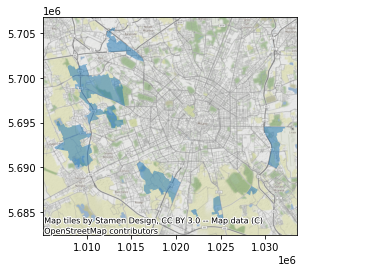

In [14]:
ax = quartieri[ ~ quartieri['NIL'].isin(df1_quartieri['NIL'])].to_crs(3857).plot(alpha=0.5)
ctx.add_basemap(ax)

# - il nome del quartiere con più aree di sosta;


In [15]:
df1_quartieri.groupby('NIL')['stalli_tot'].count()
quartiereMax = df1_quartieri.groupby('NIL')['stalli_tot'].count()[df1_quartieri.groupby('NIL')['stalli_tot'].count() == df1_quartieri.groupby('NIL')['stalli_tot'].count().max()]
quartiereMax

NIL
LORETO - CASORETTO - NOLO    4090
Name: stalli_tot, dtype: int64

# - una mappa di Milano con l'indicazione 


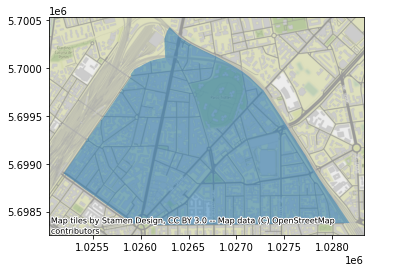

In [16]:
ax = quartieri[quartieri.NIL.isin(quartiereMax.index)].to_crs(3857).plot(alpha=0.5)
ctx.add_basemap(ax)

# - i nomi dei quartieri con un numero di aree di sosta minori della media;


In [17]:
Media = df1_quartieri.groupby('NIL')['stalli_tot'].count().mean()
Media

515.7894736842105

In [18]:
QuartieriMedia = df1_quartieri.groupby('NIL')[['stalli_tot']].count()[df1_quartieri.groupby('NIL')['stalli_tot'].count() < Media]
QuartieriMedia

,stalli_tot
NIL,
ADRIANO,99
AFFORI,491
BANDE NERE,444
BARONA,236
BICOCCA,401
BOVISA,395
BOVISASCA,146
BRUZZANO,130
COMASINA,20


#- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;


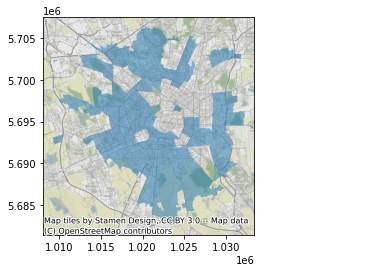

In [19]:
ax = quartieri[quartieri.NIL.isin(QuartieriMedia.index)].to_crs(3857).plot(alpha=0.5)
ctx.add_basemap(ax)

# - una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;


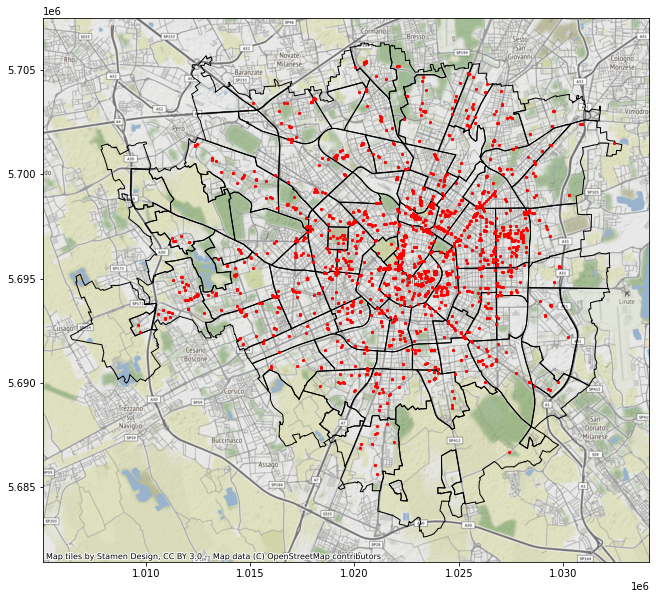

In [20]:
ax = quartieri.to_crs(3857).plot(edgecolor='k',facecolor='none',figsize=(15,10))
aree_sosta.to_crs(3857).plot(ax=ax,color='r',markersize=5)
ctx.add_basemap(ax)

# - una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;
